<a href="https://colab.research.google.com/github/GwenStacey/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
#Importing some of our more popular libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

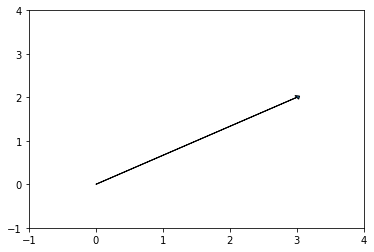

In [16]:
#Create vector
a=[3,2]
#Set x and y limits for easier visualization
plt.xlim(-1,4)
plt.ylim(-1,4)
#Plot the vector
plt.arrow(0,0,a[0],a[1],head_width=.1, head_length=0.05)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [19]:
#Create vector
b = [17,-4,-2,1]
#Calculate its norm
b_norm = np.linalg.norm(b)
#Print its norm
b_norm

17.60681686165901

The norm of a vector represents the magnitude of that vector

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [20]:
#Create vectors
c = [3,7,-2,12]
d = [9,-7,4,6]
#Calculate and print the dot product
c_dot_d = np.dot(c,d)
c_dot_d

42

They are not orthogonal because they have a dot product that does not equal 0

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [21]:
#Create matrix
e = [[7,4, 2],
     [1,3,-1],
     [2,6,-4]]
#Calculate and print its transpose
e_T = np.transpose(e)
e_T

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

In [23]:
#Calculate and print its inverse
e_inv = np.linalg.inv(e)
e_inv

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [24]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [25]:
#Show means and std deviation
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [27]:
#Calculate and print the variance
np.var(df)

customers    84653.061224
snow             7.346939
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
#No, in their current state the variance of customers looks huge compared to snow but only because the numbers in that column are larger

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [28]:
#Calculate the variance covariance matrix
np.cov(df)

array([[ 336200. ,  311190. ,  509630. ,  405490. ,  442800. ,  592040. ,
         654360. ],
       [ 311190. ,  288040.5,  471718.5,  375325.5,  409860. ,  547998. ,
         605682. ],
       [ 509630. ,  471718.5,  772524.5,  614663.5,  671220. ,  897446. ,
         991914. ],
       [ 405490. ,  375325.5,  614663.5,  489060.5,  534060. ,  714058. ,
         789222. ],
       [ 442800. ,  409860. ,  671220. ,  534060. ,  583200. ,  779760. ,
         861840. ],
       [ 592040. ,  547998. ,  897446. ,  714058. ,  779760. , 1042568. ,
        1152312. ],
       [ 654360. ,  605682. ,  991914. ,  789222. ,  861840. , 1152312. ,
        1273608. ]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [29]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
#dropping country column as our libraries don't like strings
#I assumed these were labels, in the event of them being data that we actually
#need, I'd convert to numbers instead
df_no_cntry = df.drop('Country', axis=1)

In [0]:
#Standardize the dataframe, then convert it back to a dataframe object
std_df = StandardScaler().fit_transform(df_no_cntry)
std_df = pd.DataFrame(std_df, index = df_no_cntry.index,columns = df_no_cntry.columns)

In [40]:
#Quick look to verify
std_df.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery,Country
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303,England
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122,Wales
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837,Scotland
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656,North Ireland


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
from sklearn.decomposition import PCA

In [44]:
#Initialize and fit the PCA algorithm
pca = PCA(n_components = 2)
pca.fit(std_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

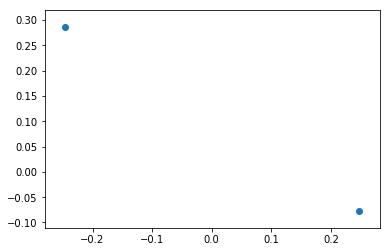

In [64]:
#I'm pretty sure this isn't right, but attempting to plot the pc's against one
#another
plt.scatter(pca.components_[:,0],pca.components_[:,1])

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [46]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
from sklearn.cluster import KMeans
#Initialize and fit the kmeans algorithm in one line
kmeans = KMeans(n_clusters = 3).fit(points)

In [0]:
#Get a reference to our cluster center
centers = kmeans.cluster_centers_

In [0]:
#Convert points to an array for easy plotting
points_array = np.array(points)

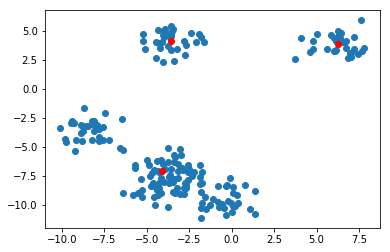

In [60]:
#PLot the centers in red, and cluster in blue
plt.scatter(points_array[:,0],points_array[:,1])
plt.scatter(centers[:,0],centers[:,1], c ='r')
